<a href="https://colab.research.google.com/github/2303A52397/STML-2303A52397/blob/main/STML_PROJECT_AUTOMOBILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
file_path = '/content/Automobile.csv'
automobile_data = pd.read_csv(file_path)

# Drop rows with missing values in the target or features
automobile_data_cleaned = automobile_data.dropna(subset=['mpg', 'horsepower'])

# Define features (X) and target (y)
X = automobile_data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = automobile_data_cleaned['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Default n_neighbors=5
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 2.4398007804124635
MAE: 1.8597468354430378


KNN

RMSE: 2.4398007804124635
MAE: 1.8597468354430378
95% Confidence Interval for predictions: ±0.5493935589288027
95% Prediction Interval for predictions: ±4.883116763380127


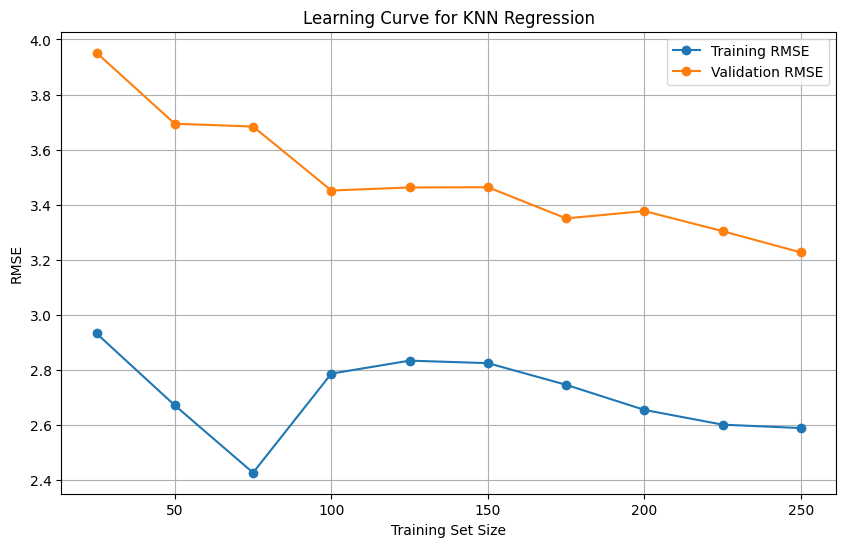

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Load the dataset
file_path = '/content/Automobile.csv'
automobile_data = pd.read_csv(file_path)

# Drop rows with missing values in the target or features
automobile_data_cleaned = automobile_data.dropna(subset=['mpg', 'horsepower'])

# Define features (X) and target (y)
X = automobile_data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = automobile_data_cleaned['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Default n_neighbors=5
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Confidence and Prediction Intervals
residuals = y_test - y_pred
mean_residual = np.mean(residuals)
std_residual = np.std(residuals, ddof=1)
n = len(y_test)

# Compute confidence interval (95%)
t_value = t.ppf(0.975, df=n-1)  # t critical value for 95% CI
confidence_interval = t_value * (std_residual / np.sqrt(n))
print(f"95% Confidence Interval for predictions: ±{confidence_interval}")

# Compute prediction interval (95%)
prediction_interval = t_value * std_residual
print(f"95% Prediction Interval for predictions: ±{prediction_interval}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for KNN Regression')
plt.legend()
plt.grid()
plt.show()


DECISION TREE

RMSE: 3.4107746844201157
MAE: 2.419603986544605
95% Confidence Interval for predictions: ±0.763364255812141
95% Prediction Interval for predictions: ±6.78492991688774


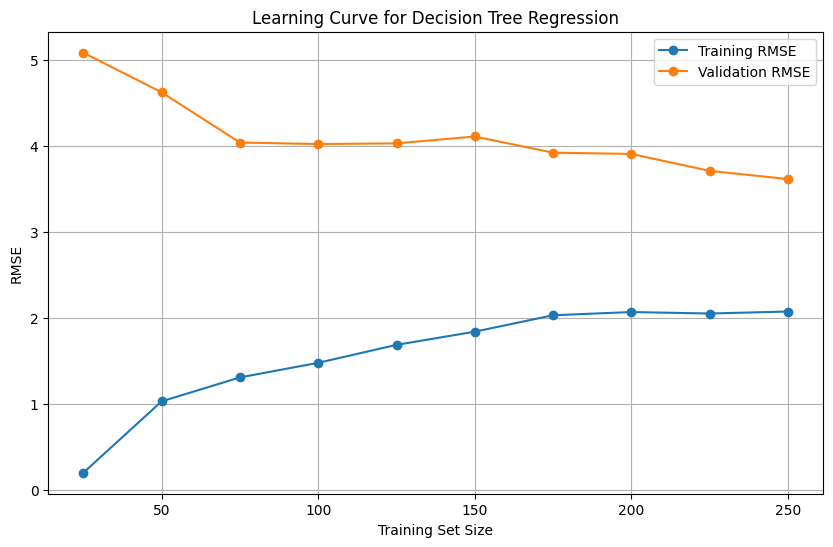

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Load the dataset
file_path = '/content/Automobile.csv'
automobile_data = pd.read_csv(file_path)

# Drop rows with missing values in the target or features
automobile_data_cleaned = automobile_data.dropna(subset=['mpg', 'horsepower'])

# Define features (X) and target (y)
X = automobile_data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = automobile_data_cleaned['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=5)  # You can tune `max_depth` and other parameters
dt.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = dt.predict(X_test_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Confidence and Prediction Intervals
residuals = y_test - y_pred
mean_residual = np.mean(residuals)
std_residual = np.std(residuals, ddof=1)
n = len(y_test)

# Compute confidence interval (95%)
t_value = t.ppf(0.975, df=n-1)  # t critical value for 95% CI
confidence_interval = t_value * (std_residual / np.sqrt(n))
print(f"95% Confidence Interval for predictions: ±{confidence_interval}")

# Compute prediction interval (95%)
prediction_interval = t_value * std_residual
print(f"95% Prediction Interval for predictions: ±{prediction_interval}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Decision Tree Regression')
plt.legend()
plt.grid()
plt.show()


RANDOM FOREST

RMSE: 2.5665667150904095
MAE: 1.8920147978555106
95% Confidence Interval for predictions: ±0.5720665287335173
95% Prediction Interval for predictions: ±5.0846385270223555


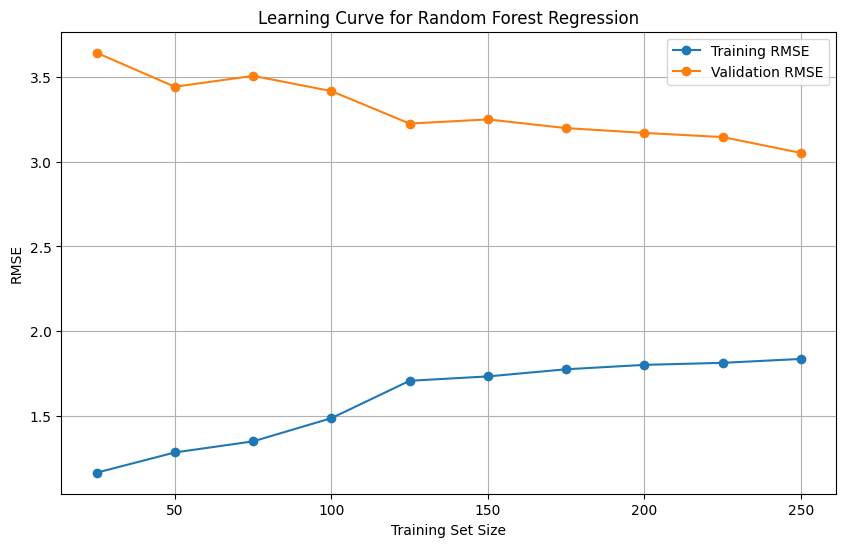

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Load the dataset
file_path = '/content/Automobile.csv'
automobile_data = pd.read_csv(file_path)

# Drop rows with missing values in the target or features
automobile_data_cleaned = automobile_data.dropna(subset=['mpg', 'horsepower'])

# Define features (X) and target (y)
X = automobile_data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = automobile_data_cleaned['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)  # Tuning parameters
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Confidence and Prediction Intervals
residuals = y_test - y_pred
mean_residual = np.mean(residuals)
std_residual = np.std(residuals, ddof=1)
n = len(y_test)

# Compute confidence interval (95%)
t_value = t.ppf(0.975, df=n-1)  # t critical value for 95% CI
confidence_interval = t_value * (std_residual / np.sqrt(n))
print(f"95% Confidence Interval for predictions: ±{confidence_interval}")

# Compute prediction interval (95%)
prediction_interval = t_value * std_residual
print(f"95% Prediction Interval for predictions: ±{prediction_interval}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Random Forest Regression')
plt.legend()
plt.grid()
plt.show()


SVM

RMSE: 3.0256366626361206
MAE: 2.0076265336041725
95% Confidence Interval for predictions: ±0.6805792779012724
95% Prediction Interval for predictions: ±6.049120938382764


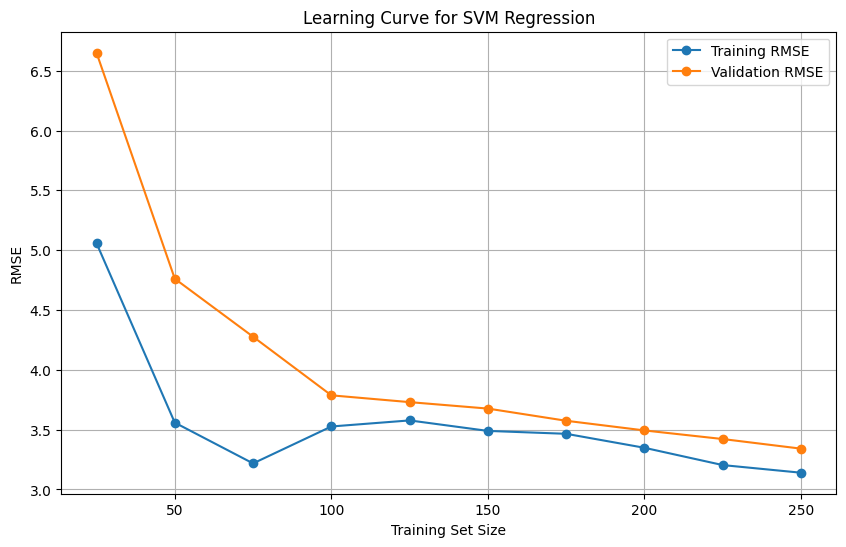

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Load the dataset
file_path = '/content/Automobile.csv'
automobile_data = pd.read_csv(file_path)

# Drop rows with missing values in the target or features
automobile_data_cleaned = automobile_data.dropna(subset=['mpg', 'horsepower'])

# Define features (X) and target (y)
X = automobile_data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = automobile_data_cleaned['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Machine (SVM) Regressor
svm = SVR(kernel='rbf', C=1, epsilon=0.1)  # You can tune `C` and `epsilon` for better performance
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Confidence and Prediction Intervals
residuals = y_test - y_pred
mean_residual = np.mean(residuals)
std_residual = np.std(residuals, ddof=1)
n = len(y_test)

# Compute confidence interval (95%)
t_value = t.ppf(0.975, df=n-1)  # t critical value for 95% CI
confidence_interval = t_value * (std_residual / np.sqrt(n))
print(f"95% Confidence Interval for predictions: ±{confidence_interval}")

# Compute prediction interval (95%)
prediction_interval = t_value * std_residual
print(f"95% Prediction Interval for predictions: ±{prediction_interval}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    svm, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, test_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for SVM Regression')
plt.legend()
plt.grid()
plt.show()
